In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('data/건강검진2024.csv', encoding='cp949')
data

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2024,4831755,41,2,13,160,50,70.0,1.0,1.0,...,13.0,6.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2024,1154608,41,2,11,155,60,74.9,1.0,1.0,...,10.0,14.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2024,3318236,41,2,13,150,55,74.0,1.0,1.0,...,19.0,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2024,3770599,41,1,16,160,70,89.0,1.0,1.0,...,26.0,28.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
4,2024,2634185,41,1,11,175,65,76.0,1.0,1.0,...,18.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2024,1945007,27,2,17,150,45,76.2,0.4,0.3,...,78.0,147.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999996,2024,2558884,28,1,12,160,70,86.1,0.7,0.7,...,18.0,255.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999997,2024,4441437,41,1,12,160,65,78.5,0.9,0.9,...,31.0,222.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999998,2024,4313591,30,1,8,175,95,105.0,1.5,1.5,...,53.0,300.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0


In [6]:
data2 = data.loc[:, ['성별코드','신장(5cm단위)','체중(5kg단위)','허리둘레','음주여부','흡연상태']]

data3 = data2.rename(columns={
    '성별코드':'성별',
    '신장(5cm단위)':'신장',
    '체중(5kg단위)':'체중'
})

# 성별
data3.loc[data3['성별'] == 1, '성별'] = 'M'
data3.loc[data3['성별'] == 2, '성별'] = 'F'

# 음주여부
data3.loc[data3['음주여부'] == 0, '음주여부'] = 'Non-drinking'
data3.loc[data3['음주여부'] == 1, '음주여부'] = 'Drinking'

# 흡연상태 (여기 오타/논리 수정)
data3.loc[data3['흡연상태'] == 1, '흡연상태'] = 'Non-smoking'
data3.loc[data3['흡연상태'] == 2, '흡연상태'] = 'Quit-smoking'
data3.loc[data3['흡연상태'] == 3, '흡연상태'] = 'Smoking'

data3


C:\Users\it\AppData\Local\Temp\ipykernel_776\3719954414.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data3.loc[data3['성별'] == 1, '성별'] = 'M'
C:\Users\it\AppData\Local\Temp\ipykernel_776\3719954414.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-drinking' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data3.loc[data3['음주여부'] == 0, '음주여부'] = 'Non-drinking'
C:\Users\it\AppData\Local\Temp\ipykernel_776\3719954414.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-smoking' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data3.loc[data3['흡연상태'] == 1

,성별,신장,체중,허리둘레,음주여부,흡연상태
0,F,160,50,70.0,Drinking,Non-smoking
1,F,155,60,74.9,Drinking,Non-smoking
2,F,150,55,74.0,Drinking,Non-smoking
3,M,160,70,89.0,Drinking,Non-smoking
4,M,175,65,76.0,Drinking,Non-smoking
...,...,...,...,...,...,...
999995,F,150,45,76.2,Non-drinking,Non-smoking
999996,M,160,70,86.1,Non-drinking,Non-smoking
999997,M,160,65,78.5,Non-drinking,Smoking
999998,M,175,95,105.0,Non-drinking,Non-smoking


In [16]:
drinking=data3.groupby(['성별', '음주여부'])['음주여부'].count()
smoking=data3.groupby(['성별', '흡연상태'])['흡연상태'].count()
drinking=drinking.to_frame(name='count')
smoking=smoking.to_frame(name='count')
drinking=drinking.reset_index()
smoking=smoking.reset_index()
drinking
smoking

,성별,흡연상태,count
0,F,Non-smoking,445993
1,F,Quit-smoking,17127
2,F,Smoking,18901
3,M,Non-smoking,197808
4,M,Quit-smoking,158399
5,M,Smoking,161654


c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:

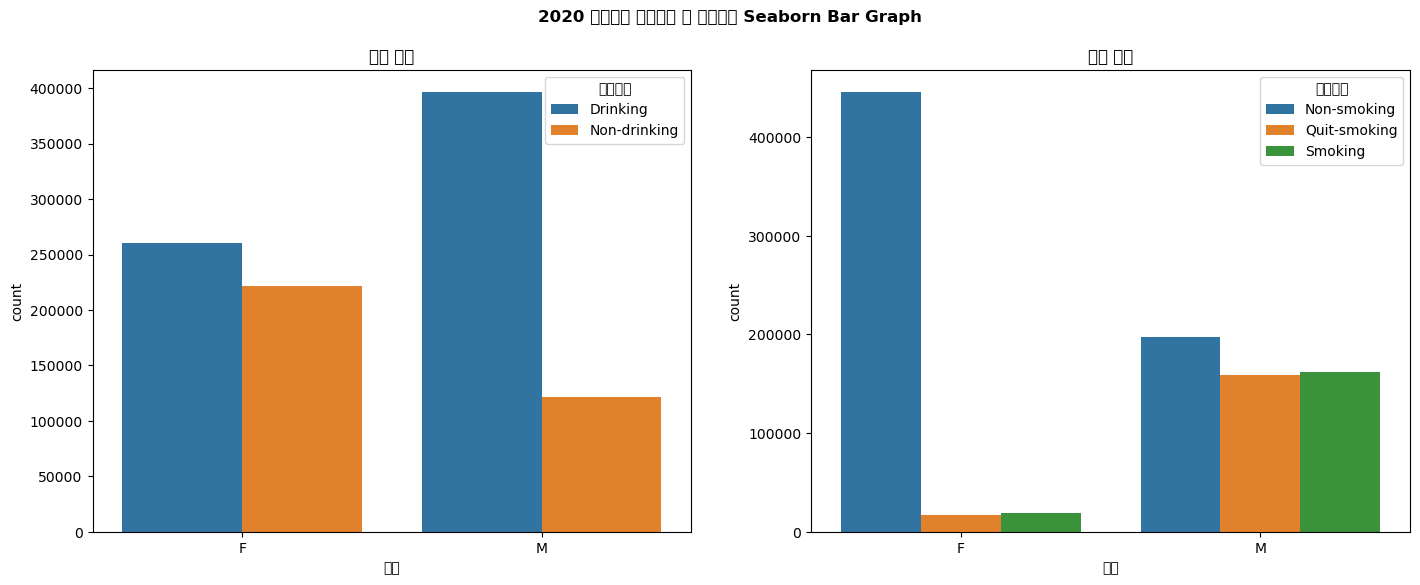

In [17]:
fig = plt.figure(figsize=(17, 6))

area1 = fig.add_subplot(1, 2, 1)
area2 = fig.add_subplot(1, 2, 2)

ax1 = sns.barplot(
    data=drinking,
    x='성별',
    y='count',
    hue='음주여부',
    ax=area1
)

ax2 = sns.barplot(
    data=smoking,
    x='성별',
    y='count',
    hue='흡연상태',
    ax=area2
)

fig.suptitle(
    '2020 건강검진 음주여부 및 흡연상태 Seaborn Bar Graph',
    fontweight='bold'
)

area1.set_title('음주 유형')
area2.set_title('흡연 유형')

plt.show()


In [24]:
male_data=data3.loc[data3.성별=='M',['성별', '신장', '체중', '허리둘레','음주여부','흡연상태']]
female_data=data3.loc[data3.성별=='F',['성별', '신장', '체중', '허리둘레','음주여부','흡연상태']]
male_data
female_data

,성별,신장,체중,허리둘레,음주여부,흡연상태
0,F,160,50,70.0,Drinking,Non-smoking
1,F,155,60,74.9,Drinking,Non-smoking
2,F,150,55,74.0,Drinking,Non-smoking
10,F,145,60,87.0,Non-drinking,Non-smoking
11,F,155,55,76.5,Drinking,Non-smoking
...,...,...,...,...,...,...
999989,F,165,65,75.0,Non-drinking,Non-smoking
999990,F,155,45,66.0,Non-drinking,Non-smoking
999992,F,145,50,73.3,Non-drinking,Non-smoking
999993,F,155,95,107.0,Non-drinking,Non-smoking


c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


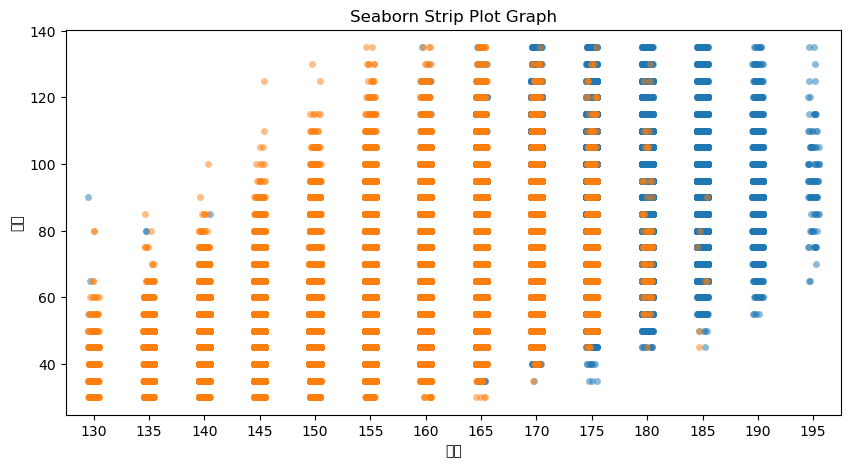

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 5))
plt.title('Seaborn Strip Plot Graph')

sns.stripplot(x='신장', y='체중', data=male_data, alpha=0.5)
sns.stripplot(x='신장', y='체중', data=female_data, alpha=0.5)

plt.show()


c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()

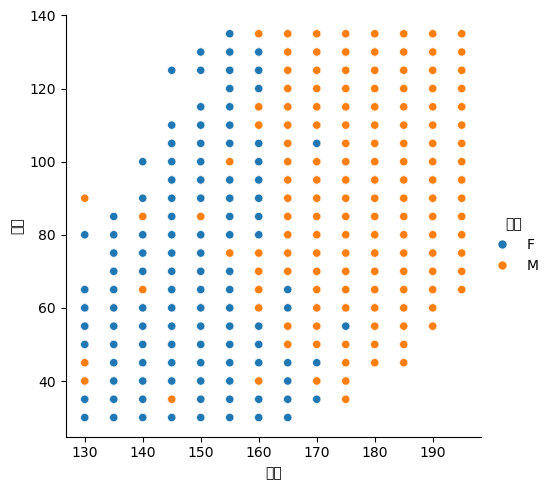

In [27]:
sns.relplot(x='신장', y='체중', data=data3, hue='성별')
plt.show()

c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54728 (\N{HANGUL SYLLABLE HEO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46168 (\N{HANGUL SYLLABLE DUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\it\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Use

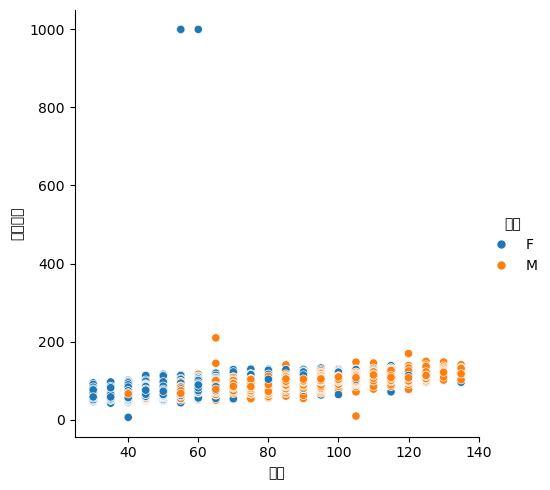

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

data4 = data3.loc[:, ['성별', '신장', '체중', '허리둘레', '음주여부', '흡연상태']]

sns.relplot(
    data=data4,
    x='체중',
    y='허리둘레',
    hue='성별'
)

plt.show()


c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\User

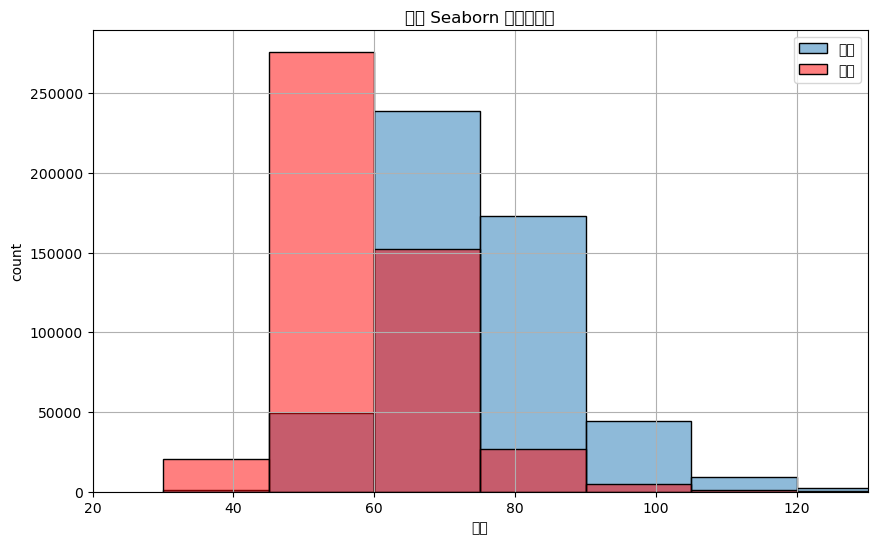

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

male_data = data3.loc[data3['성별'] == 'M']
female_data = data3.loc[data3['성별'] == 'F']

plt.figure(figsize=(10, 6))

sns.histplot(
    male_data['체중'],
    bins=7,
    alpha=0.5,
    label='남성'
)

sns.histplot(
    female_data['체중'],
    bins=7,
    alpha=0.5,
    label='여성',
    color='r'
)

plt.xlim(20, 130)
plt.xlabel('체중')
plt.ylabel('count')
plt.title('체중 Seaborn 히스토그램')
plt.grid()
plt.legend()
plt.show()


c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\it\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\User

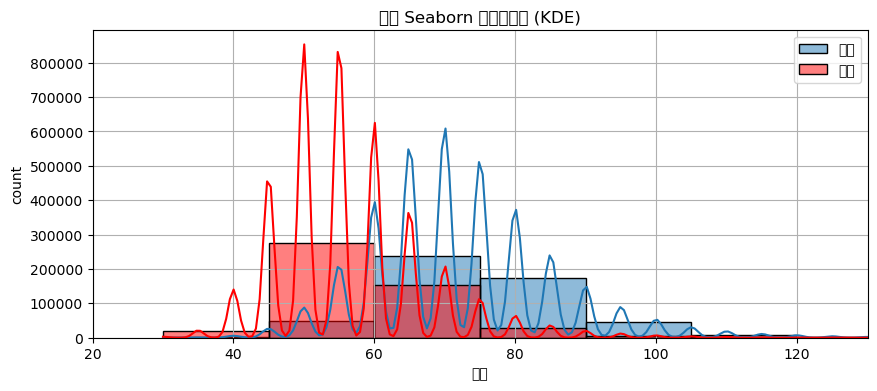

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

sns.histplot(
    male_data['체중'],
    bins=7,
    alpha=0.5,
    label='남성',
    kde=True
)

sns.histplot(
    female_data['체중'],
    bins=7,
    alpha=0.5,
    label='여성',
    color='r',
    kde=True
)

plt.xlim(20, 130)
plt.xlabel('체중')
plt.ylabel('count')
plt.title('체중 Seaborn 히스토그램 (KDE)')
plt.grid()
plt.legend()
plt.show()
